In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# %%
# Cargo datos de entrenamiento 
archivo =  '../data/processed/X_train.feather'
X_train = pd.read_feather(archivo )
X_train.drop(['index'],axis=1)
print(X_train.shape)

archivo = '../data/processed/y_train.feather'
y_train = pd.read_feather(archivo )
y_train = y_train['es_desertor']
print(y_train.shape)

# %%
# cargo datos de test 
archivo =  '../data/processed/X_test.feather'
X_test= pd.read_feather(archivo )
X_test.drop(['index'],axis=1)
print(X_test.shape)

archivo = '../data/processed/y_test.feather'
y_test = pd.read_feather(archivo )
y_test = y_test['es_desertor']
print(y_test.shape)

(100794, 95)
(100794,)
(25199, 95)
(25199,)


In [3]:
X_test = X_test.drop(['index'],axis=1)
X_train = X_train.drop(['index'],axis=1)

In [4]:
#validación cruzada
nVecinos = range(1,16)
#X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True, random_state=0, stratify= y_train)

param_grid = {'n_neighbors': np.arange(1,16,1)}
grid = GridSearchCV(KNeighborsClassifier(),scoring='accuracy',param_grid=param_grid,cv=5).fit(X_train,y_train)
print('best mean cross-validation score : {:.3f}'.format(grid.best_score_))
print('best parameters: {}'.format(grid.best_params_))


best mean cross-validation score : 0.903
best parameters: {'n_neighbors': 15}


In [5]:
scores = np.array(grid.cv_results_['mean_test_score'])
stdvalues = np.array(grid.cv_results_['std_test_score'])

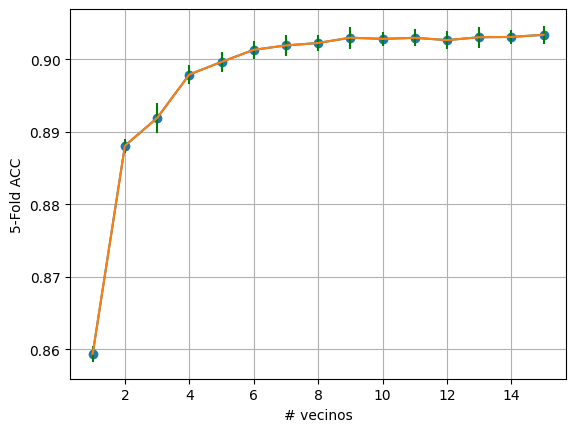

acc (test): (:.2f)


In [6]:
plt.plot(nVecinos,scores,'-o')
plt.errorbar(nVecinos,scores,yerr=stdvalues,ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print('acc (test): (:.2f)'.format(grid.score(X_test, y_test)))

In [7]:
#knn = KNeighborsClassifier  (n_neighbors= grid.best_params_['n_neighbors']  , weights='distance', algorithm='kd_tree', leaf_size=20, p=1)
knn = KNeighborsClassifier  (n_neighbors= grid.best_params_['n_neighbors'] , weights='distance', algorithm='brute',  p=1  )
knn.fit(X_train,y_train)
y_pred_KNN = knn.predict(X_test)

print('Precisión Vecinos más Cercanos: {}'.format(accuracy_score(y_test, y_pred_KNN))) 


Precisión Vecinos más Cercanos: 0.9081709591650462


In [8]:
#Reviso con MAtriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)

[[19790   541]
 [ 1773  3095]]


In [9]:
#Metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     20331
           1       0.85      0.64      0.73      4868

    accuracy                           0.91     25199
   macro avg       0.88      0.80      0.84     25199
weighted avg       0.90      0.91      0.90     25199



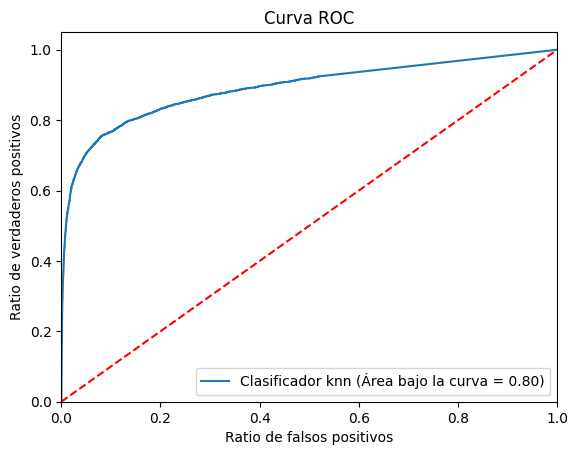

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_knn = round(logit_roc_auc,2)
plt.figure()
plt.plot(fpr, tpr, label='Clasificador knn (Área bajo la curva = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC') si descomentas esta línea puedes guardar la gráfica
plt.show()
